# Exploratory Data Analysis of the Titanic Dataset

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import math
from matplotlib.pyplot import scatter as plt_scatter

In [3]:
path = "Z:\\python_stuff\\titanic\\titanic\\"
dataset_path = path+"datasets\\"

## Features and what they mean

In [4]:
training_data = pd.read_csv(dataset_path+"train.csv")

### List of Features:
##### survival - Survival - 0 = No, 1 = Yes
##### pclass - Ticket - class 1 = 1st, 2 = 2nd, 3 = 3rd
##### sex - Sex	
##### Age - Age in years	
##### sibsp - number of siblings / spouses aboard the Titanic	
##### parch - number of parents / children aboard the Titanic	
##### ticket - Ticket number	
##### fare - Passenger fare	
##### cabin - Cabin number	
##### embarked - Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton

## Applying feature engineering to the Titanic dataset to get extra features

In [5]:
person_title = [re.findall("\,\s([\w+|\w+\s+\w]+\.)",i)[0] if len(re.findall("\,\s([\w+|\w+\s+\w]+\.)",i)) > 0 else None for i in training_data["Name"]]
training_data["title"] = person_title
training_data["log_fare"] = [math.log(i) if i != 0 else 0 for i in training_data["Fare"]]

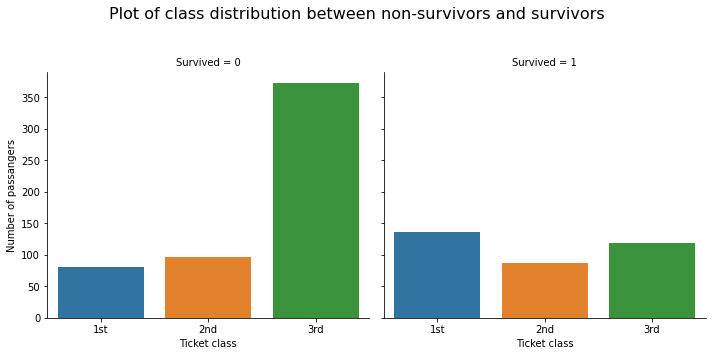

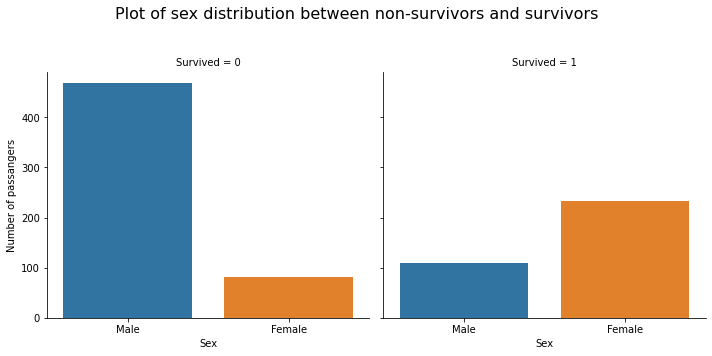

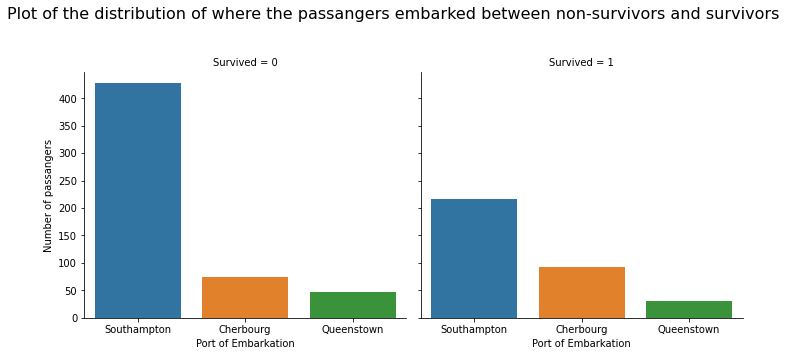

In [7]:
ax = sns.catplot(x="Pclass", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Ticket class')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of class distribution between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["1st","2nd","3rd"])

ax = sns.catplot(x="Sex", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Sex')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of sex distribution between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["Male","Female"])

ax = sns.catplot(x="Embarked", col="Survived", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)
ax.set_xticklabels(["Southampton", "Cherbourg", "Queenstown"])

In [10]:
from scipy import stats

In [77]:
def chi2_square_test(_df, _test_group, _test_group_value_list, _freq_group):
    _group_list = []
    for value in _test_group_value_list:
        _group_list.append(_df[_df[_test_group] == value][_freq_group].value_counts())
    
    _contingency_table = np.array([i.values for i in _group_list])
    
    _chi_square_result = stats.chi2_contingency(_contingency_table)
    
    _p_value = _chi_square_result[1]
    
    if chi_square_embark[1] <= 0.05:
        print("The P-value is below the critical value so the null hypothesis is rejected. The P-value is: {}".format(_p_value))
        print("We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.")
    if chi_square_embark[1] > 0.05:
        print("The P-value is above the critical value so the null-hypothesis cannot be rejected: {}".format(_p_value))
    
    return _p_value
    

### Null hypothesis: The frequency of passenger embarkation is the same for the surviving and non-surviving passengers

In [80]:
chi2_square_test(training_data, "Survived", [1,0], "Embarked")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 1.769922284120912e-06
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


1.769922284120912e-06

### Null hypothesis: The frequency of the sex of passengers is the same for the surviving and non-surviving passengers

In [79]:
chi2_square_test(training_data, "Survived", [1,0], "Sex")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 2.199000710497729e-09
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


2.199000710497729e-09

### Null hypothesis: The frequency of the class of passengers is the same for the surviving and non-surviving passengers

In [83]:
chi2_square_test(training_data, "Survived", [1,0], "Pclass")

The P-value is below the critical value so the null hypothesis is rejected. The P-value is: 1.95469215276003e-15
We can say with high confidence that the difference in  frequency for the test groups are not due to chance alone.


1.95469215276003e-15

Text(0.5, 0.98, 'Plot of the distribution of where the passangers embarked between non-survivors and survivors')

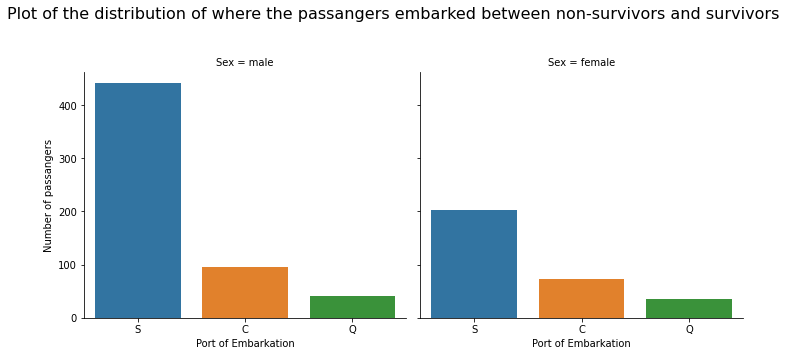

In [28]:
ax = sns.catplot(x="Embarked", col="Sex", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)

Text(0.5, 0.98, 'Plot of the distribution of where the passangers embarked between non-survivors and survivors')

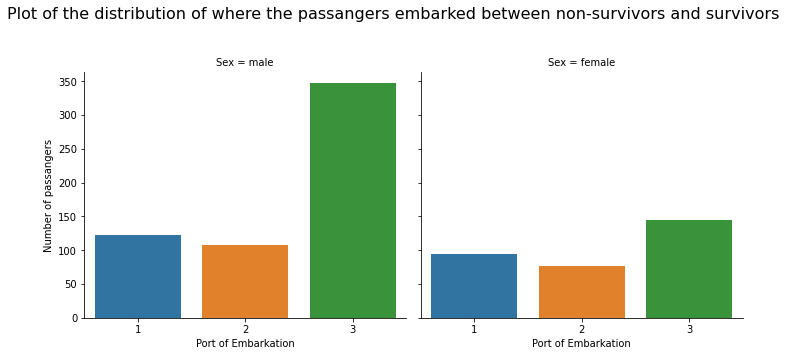

In [29]:
ax = sns.catplot(x="Pclass", col="Sex", data=training_data, ci = None, kind = "count").set(ylabel = 'Number of passangers', xlabel = 'Port of Embarkation')
ax.fig.subplots_adjust(top=0.8)
ax.fig.suptitle('Plot of the distribution of where the passangers embarked between non-survivors and survivors', fontsize=16)

In [ ]:
# Make simple classifier based on data analysis. Men + 3rd class. What are the performance metrics? How well does this simple "classifier" work based on an EDA